# Algorithm 3 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

637 patches created with algorithm 3 loaded.
[4.26612391e+04 3.13429614e+04 1.94109045e+04 1.21913979e+04
 7.33157856e+03 6.16348623e+03 5.78839620e+03 5.27923305e+03
 4.73258867e+03 4.49218287e+03 4.15589145e+03 3.85661199e+03
 3.33747557e+03 3.00158181e+03 2.85439496e+03 2.40632438e+03
 2.36426055e+03 2.17805442e+03 2.06980291e+03 2.02833180e+03
 1.91217943e+03 1.88929561e+03 1.69321397e+03 1.62817932e+03
 1.51202448e+03 1.43265011e+03 1.35892393e+03 1.25890292e+03
 1.19361252e+03 1.17032858e+03 1.10914867e+03 1.10235085e+03
 1.03536304e+03 1.01659296e+03 9.96095902e+02 9.47866035e+02
 9.26402567e+02 8.58393039e+02 7.90427083e+02 7.53785264e+02
 7.17390647e+02 6.90994076e+02 6.54927781e+02 6.31697186e+02
 5.90807910e+02 5.55987889e+02 5.49831535e+02 5.11978462e+02
 4.86081948e+02 4.84424825e+02 4.78311287e+02 4.65261690e+02
 4.48600652e+02 4.35512105e+02 4.27818705e+02 4.08684139e+02
 4.05875581e+02 3.89697098e+02 3.80117160e+02 3.75849509e+02
 3.69660723e+02 3.55775979e+02 3.4843283

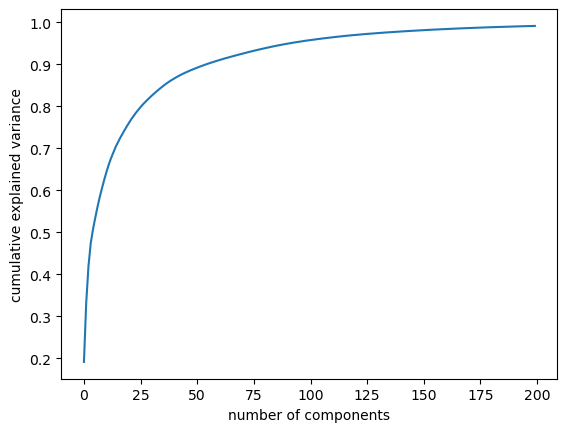

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra3.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav3.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 3 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)

# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
os.chdir('..')
os.chdir('./models/')
np.savetxt('mean3.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale3.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
with open('pca3.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)